#**Correlação e Regressão (Parte 2)**



```
(*) Adaptado de material preparado pelo Prof. Wagner Tanaka e Prof. Ronaldo Prati
```


Depois de constatar que existe uma correlação linear significante, é possível escrever uma equação que descreva a RELAÇÃO LINEAR entre as variáveis `X` e `Y`.
Essa equação chama-se **reta de regressão**, ou reta do ajuste ótimo. 

De fato, já vimos um exempo desta reta fazendo uso da função `lmplot()` do pandas (lm de linear model). Vamos reproduzir aqui.


## Base de dados de Notas e Faltas

Antes de prosseguir precisamos carregar a base de dados para nossos exemplos. Trata-se da tabela ESTUDANTES contendo duas  informações: Notas e Faltas.

In [ ]:
#https://drive.google.com/file/d/1tUCrugG4okAM9x5oRMDskqMxlDbblFEF/view?usp=sharing
import pandas as pd 
codigo = "1tUCrugG4okAM9x5oRMDskqMxlDbblFEF"
file = "https://drive.google.com/u/3/uc?id=" + codigo + "&export=download"
# Note a especificação de SEPARADOR (ponto e vírgula)
# Note a especificação de VÍRGULA DECIMAL
alunos = pd.read_csv(file, sep = ";",decimal=",")
alunos

,Faltas,Notas
0,8,7.8
1,2,9.2
2,5,9.0
3,12,5.8
4,15,4.3
5,9,7.4
6,6,8.1


`info()` e `describe()` podem ser utilizados para explorar os dados. Note que esta tabela contém apenas 7 linhas.

In [ ]:
alunos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Faltas  7 non-null      int64  
 1   Notas   7 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 240.0 bytes


A instrução a seguir calcula o coeficiente de correlação entre Faltas e Notas. 

In [ ]:
alunos['Faltas'].corr(alunos['Notas'])

-0.9747632142351271

O coeficiente de correlação é **NEGATIVO** e próximo de **-1**. Portanto, os dois atributos **Faltas por Semestre (X)** e **Nota Final (Y)** possuem **FORTE** correlação **NEGATIVA**. 

### Reta de Regressão

Dado que temos uma correlação bem significativa, muito próxima de 1 (em módulo), vamos tentar escrever a reta de regressão. A função lmplot, traça essa reta, conforme instruções a seguir. 
> `Seaborn` é uma biblioteca gráfica que atua em cima do matplotlib e ajuda a melhorar o visual dos gráficos, dando uma aparência mais bem acabada. Veremos isto melhor mais adiante quando formos explorar gráficos.

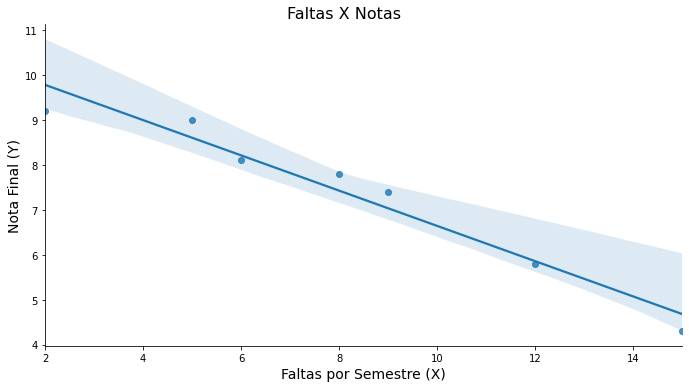

In [ ]:
import seaborn as sns 
# graf é o nome da variável que armazena o gráfico (poderíamos usar outro nome de variável) 
graf = sns.lmplot(x="Faltas", y="Notas", data=alunos)
graf.fig.set_size_inches(10,5)
graf.fig.suptitle('Faltas X Notas', fontsize=16, y=1.02)
graf.set_xlabels("Faltas por Semestre (X)", fontsize=14)
graf.set_ylabels("Nota Final (Y)", fontsize=14)

Note que a reta no gráfico de dispersão acima, chega a tocar alguns pontos. E os demais, que não tocam, estão relativamente próximos da reta.

É importante registrar que quanto mais afastados estiverem os pontos (na reta) pior a reta representará a relação entre as amostras.

### Equação de Regressão

O próximo passo é a equação de regressão, ou seja, a equação que descreve a relação linear entre as variáveis X e Y.


O ajuste de uma reta é um **modelo linear** (linear model) que relaciona a variável dependente `Y` e a variável independente `X` por meio da equação de uma reta do tipo

                         Y = mX + b

 sendo
 * Y : a variável dependente
 * `m` : a inclinação da reta (coeficiente angular)
 * X: a variável independente
 * `b` : o intercepto de `Y` (valor de `Y` para `X` = 0)


Em python, podemos usar a biblioteca numpy para encontrar essa (equação da reta. 

Para isso, usamos o método `polifit` (da biblioteca `numpy`) , que pode ser usado para encontrar polinômios que se ajustam aos dados. 

Vamos utilizar os seguintes parâmetros:
* x (variável independente) = Faltas;
* y (variável dependente) = Notas
* deg (degree = grau do polinômio = 1, pois queremos uma reta. 

O resultado dessa chamada usando polifit são:
* m - coeficiente de inclinação da reta
* b - intercepto

In [3]:
import numpy as np
import pandas as pd 
codigo = "1tUCrugG4okAM9x5oRMDskqMxlDbblFEF"
file = "https://drive.google.com/u/3/uc?id=" + codigo + "&export=download"
alunos = pd.read_csv(file, sep = ";",decimal=",")
m, b = np.polyfit(x=alunos['Faltas'], y=alunos['Notas'], deg = 1)

print("inclinação m:", m)
print("intercepto b:", b)

inclinação m: -0.3924129353233834
intercepto b: 10.56679104477612


Assim, `polytif()` nos informa que a inclinação (m) = -0.3924 e o intercepto (b) = 10.5667

Podemos então escrever a equação da reta como :

Y = -0.3924X + 10.5667

Verificando a reta do gráfico de dispersão o "ponto" mais próximo da reta é X = 12. Outro também bem próximo é X = 6. 

Vamos então, testar estes valores de X na equação: `Y = -0.3924X + 10.5667`



In [4]:
# Lembre-e que m e b foram obtidos acima com polifit()
x = 12
y = m*x+b
y

5.85783582089552

Para verificar a precisão deste valor obtido pela equação, precisamo listar os dados de notas e faltas da tabela.

Note, na tabela acima, que para Faltas = 12, Notas = 5.8, ou seja, bem próximo ao valor obtido pela equação da reta (5.85)

In [5]:
alunos

,Faltas,Notas
0,8,7.8
1,2,9.2
2,5,9.0
3,12,5.8
4,15,4.3
5,9,7.4
6,6,8.1


In [ ]:
Verificando com x = 6, temos:

In [7]:
# Lembre-e que m e b foram obtidos acima com polifit()
x = 6
y = m*x+b
y

8.21231343283582

Note, na tabela acima, que para Faltas = 6, Notas = 8.1, ou seja, bem próximo ao valor obtido pela equação da reta (5.85)

Usando um valor fora da amostra (`x = 20`), que não consta na tabela, a **Nota Final (Y)** prevista será:

In [ ]:
# Lembre-e que m e b foram obtidos acima com polifit()
x = 20
y = m*x+b
y

Pode-se concluir que com ``20 faltas``, a nota final do aluno será `2,7`.

### Verificação do Modelo Completo

Podemos calcular a Estimativa de **TODAS** as notas da tabela (previsão de Notas) usando equação da reta encontrada. Para tal, basta usar o atributo `"Faltas"`, no lugar de `"x"`, conforme abaixo. 

O que ocorre de fato é que a instrução `m*alunos.["Faltas"]+b` calcula o valor estimado para cada linha da tabela, gerando um **Conjunto de Valores**, ao invés de um único valor como fizemos acima para x=6 e x=20.

In [8]:
m, b = np.polyfit(x=alunos['Faltas'], y=alunos['Notas'], deg = 1)
modelo = m*alunos["Faltas"]+b
print(modelo)

0    7.427488
1    9.781965
2    8.604726
3    5.857836
4    4.680597
5    7.035075
6    8.212313
Name: Faltas, dtype: float64


Note que print(modelo) mostrou todos os valores armazenados em modelo. Note também que "Name" última linha foi automaticamente assumido como "Faltas", mas nada verdade isso é "Notas Estimadas". Podemos "renomear" isso com a função `rename()`. Vejamos!

In [9]:
modelo = modelo.rename('NotasEstimadas')
print(modelo)

0    7.427488
1    9.781965
2    8.604726
3    5.857836
4    4.680597
5    7.035075
6    8.212313
Name: NotasEstimadas, dtype: float64


Note que agora o "Name" (última linha acima) é "NotasEstimadas" (e não Faltas).

Isso (renomear) foi importante pois agora queremos **exibir lado a lado** "Faltas" (da tabela original) com as Faltas Estimadas para verificar o modelo, ou seja, se os valores estimados são de fato bem próximos.

Uma forma de exigir lado a lado é "juntar" as duas colunas a exibir, em um novo DATAFRAME (nova tabela), usando a função DATAFRAME, conforme abaixo. Neste exemplo, chamei a nova tabela de `compara`.

In [ ]:
compara = pd.DataFrame([alunos.Notas, modelo])
print(compara)

Note que DATAFRAME gerou a nova tabela "invertida", ou seja, as colunas `Notas` e `NotasEstimadas` viraram "Linhas". Para resolver isso vamos gerar a `compara` novamente, mas agora usando a função `transpose()` conforme abaixo.

In [ ]:
compara = pd.DataFrame([alunos.Notas, modelo]).transpose()
print(compara)

Agora, podemos olhar para cada Nota e NotaEstimada, lado a lado. Note que o modelo (notas estimadas), gerado pela equação da reta, possui valores  próximos em todas as linhas. Por exemplo, na última linha, para `Nota=8.1` temos `NotaEstimada=8.21` a partir da quantidade de faltas.

Não podemos esquecer que o o coeficiente de correlação entre "Faltas" e "Notas" foi de `-0.9747`, ou seja, muito forte, mas não foi exatamente 1.

Aliás, parece estranho olhar para um número negativo (`-0.9741`) e enxergar isto como correlação forte.

O conceito de **Coeficiente de Determinação** ajuda a lidar melhor com isso. Vejamos.

### Coeficiente de Determinação

O coeficiente de determinação ($R^2$) é definido como a relação que mede a proporção da variação total da **variável dependente**, que é explicada pela variação da **variável independente**.

* O coeficiente de determinação (de Pearson) é o **quadrado do coeficiente de correlação**;
* O coeficiente de determinação $R^2$, também denominado `r-quadrado`, é sempre um número positivo dentro do intervalo [0; 1].
* Pode-se deduzir que quanto maior for $R^2$ melhor será o poder de explicação da reta de regressão.


Relembremos o coeficiente de correlação para então calcularmos o coeficiente de determinação.


In [10]:
ccor = alunos['Faltas'].corr(alunos['Notas'])
print("Coeficiente de Correlação", ccor)

Coeficiente de Correlação -0.9747632142351271


Para calcular o coeficiente de determinação basta elevar o coeficiente de correlação ao quadrado usando o operador `**`.

In [11]:
cdet = ccor**2
print("Coeficiente de determinação: ", cdet)

Coeficiente de determinação:  0.9501633238259963


O valor obtido de `0.95` como coeficiente de determinação significa que (...):
* (...) cerca de 5% da variabilidade da "Nota" (final) não pode ser descrita ou explicada pela variabilidade do número de Faltas (por semestre) e vice-versa.


Na prática, é pouco comum que tenhamos uma correlação perfeita $R^2=1$
pois existem muitos fatores que determinam as relações entre variáveis na vida real.


## Exercícios

### Exercícios 01

Tente estima quanto seria a NOTA de um aluno com 1 falta

In [14]:
#digite sua resposta aqui
X= 1
Y = -0.3924*X + 10.5667
print(Y)

10.1743


## Extra

### Entrada de Dados [1]

Em python, a função input() é usada para a realizar a entrada de dados. Utilizamos **entrada de dados** quando precisamos que o usuário digite uma informação para ser processada.

Por exemplo, podemos perguntar o valor de "faltas" para o qual o usuário gostaria de fazer a predição de "notas". Vide exemplo a seguir.

In [ ]:
x = input()

Vamos "printar" este valor digitado pelo usuário, apenas para conferir

In [ ]:
print("%.2f" % x)

A mensagem acima, mostra uma mensagem de erro : `must be real number, not str` (em português: deve ser número real, não texto)

Isto ocorre porque o input() armazena tudo que o usuário digita como se fosse "texto" (caracteres alfanuméricos). 
Acima estamos solicitando a impressão (print) de `x` como número real: `%.2f`.
Quando solicitamos a digitação de números devemos converter o que foi digitado pra número. Se for um número real, usamos a instrução float(input()) conforme abaixo:

In [18]:
x = float(input())

1


In [19]:
print("%.2f" % x)

1.00


Note que agora o print (com %.2f que indica um número real com duas casas decimais) foi impresso normalmente (sem mensagem de erro).

Podemos ainda fazer isso em duas etapas:
* x = input()
* x = float(x)

In [ ]:
x = input()
x = float(x)
print("%.2f" % x)


Agora já podemos usar o x (float, ou seja, número real) para fazer cálculos conforme abaixo:


In [ ]:
x = float(input())
y = m*x+b
print("A predição de Nota para ", x, " faltas é = %.2f" % y)

Execute novamente a célula acima, digitando outro valor para x, e veja o resultado. As instruções funcionam para qualquer valor de x informado.

## Completo

In [23]:
import pandas as pd 
codigo = "1tUCrugG4okAM9x5oRMDskqMxlDbblFEF"
file = "https://drive.google.com/u/3/uc?id=" + codigo + "&export=download"
alunos = pd.read_csv(file, sep = ";",decimal=",")
import numpy as np
m, b = np.polyfit(x=alunos['Faltas'], y=alunos['Notas'], deg = 1)
x = input("Digite Faltas: ")
x = float(x)
y = m*x+b
print("A predição de Nota para ", x, " faltas é = %.2f" % y)

Digite Faltas: 6.8989
A predição de Nota para  6.8989  faltas é = 7.86
